<a href="https://colab.research.google.com/github/maxwellherd/pytorch-cheatsheet/blob/master/NewDataTest_Michael.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install opendatasets
!pip3 install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

torch.manual_seed(1)

In [ ]:
print(torch.cuda.is_available())

In [ ]:
import os 
root = os.getcwd() + '/geolocation-geoguessr-images-50k/compressed_dataset'
kaggleDict = {}
for subdir, dirs, files in os.walk(root):    
    for file in files:
        key, value = os.path.basename(subdir), file
        kaggleDict.setdefault(key, []).append(value)

In [ ]:
import random
random.seed(10)

for country in kaggleDict:
  if len(kaggleDict[country]) > 2000:
         print(country)
# Brazil, United States, United Kingdom, France and Japan have samples over 2000
brazilSet = kaggleDict['Brazil']
franceSet = kaggleDict['France']
ukSet = kaggleDict['United Kingdom']
japanSet = kaggleDict['Japan']
usSet = kaggleDict['United States']

In [ ]:
for img in range(len(brazilSet)):
  brazilSet[img] = root+ '/Brazil/'+ brazilSet[img]
for img in range(len(franceSet)):
  franceSet[img] = root+ '/France/'+ franceSet[img]
for img in range(len(ukSet)):
  ukSet[img] = root+ '/United Kingdom/'+ ukSet[img]
for img in range(len(japanSet)):
  japanSet[img] = root+ '/Japan/'+ japanSet[img]
for img in range(len(usSet)):
  usSet[img] = root+ '/United States/'+ usSet[img]
  
brazilFiles = random.sample(brazilSet, 2000)
franceFiles = random.sample(franceSet, 2000)
ukFiles = random.sample(ukSet, 2000)
japanFiles = random.sample(japanSet, 2000)
usFiles = random.sample(usSet, 2000)

In [ ]:
import torch
import glob
from torch.utils.data import random_split

countries = ['Brazil','France','United Kingdom', 'Japan', 'United States']
num_class = len(countries)

img_files = brazilFiles+franceFiles+ukFiles+japanFiles+usFiles

# img_files = glob.glob(root+'/*/*.jpg',recursive=True)
print(len(img_files))
idx_to_class = {i:j for i, j in enumerate(countries)}
print(idx_to_class)
class_to_idx = {value:key for key,value in idx_to_class.items()}
print(class_to_idx)

#random split
train_idx,val_idx,test_idx=random_split(img_files, [0.6, 0.2, 0.2], generator=torch.Generator().manual_seed(42))
    
train_list=[img_files[i] for i in train_idx.indices]
test_list=[img_files[i] for i in test_idx.indices]
val_list=[img_files[i] for i in val_idx.indices]

print(len(train_idx.indices),len(test_idx.indices),len(val_idx.indices))
print(len(train_list),len(test_list),len(val_list))   

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
geoguessr_data = '/content/geoguessr_data'

if not os.path.isdir(geoguessr_data):
  os.makedirs(geoguessr_data)

train_path = geoguessr_data+'/train'
test_path = geoguessr_data+'/test'
valid_path = geoguessr_data+'/val'

if not os.path.isdir(train_path):
  os.makedirs(train_path)

if not os.path.isdir(test_path):
  os.makedirs(test_path)

if not os.path.isdir(valid_path):
  os.makedirs(valid_path)

Mounted at /content/gdrive


In [ ]:
import shutil
root_dir = '/content/gdrive/MyDrive/Colab Notebooks/geoguessr_solver/geoguessr_data'

for subdir, dirs, files in os.walk(root):
    for file in files:
        if 'Brazil' in subdir or 'France' in subdir or 'United Kingdom' in subdir or 'Japan' in subdir or 'United States' in subdir:
          for i in range(len(train_list)):
            if train_list[i] == os.path.join(subdir,file):
              if 'Brazil' in subdir:
                class_type = 'Brazil'
              elif 'France' in subdir:
                class_type = 'France'
              elif 'United Kingdom' in subdir:
                class_type = 'United Kingdom'
              elif 'Japan' in subdir:
                class_type = 'Japan'
              else:
                class_type='United States'

              path_name = os.path.join(train_path,class_type)

              if not os.path.exists(path_name):
                os.makedirs(path_name)
              shutil.copy(train_list[i], path_name)

          for i in range(len(test_list)):
            if test_list[i] == os.path.join(subdir,file):
              if 'Brazil' in subdir:
                class_type = 'Brazil'
              elif 'France' in subdir:
                class_type = 'France'
              elif 'United Kingdom' in subdir:
                class_type = 'United Kingdom'
              elif 'Japan' in subdir:
                class_type = 'Japan'
              else:
                class_type='United States'
              path_name = os.path.join(test_path,class_type)

              if not os.path.exists(path_name):
                os.makedirs(path_name)
              shutil.copy(test_list[i], path_name)

          for i in range(len(val_list)):
            if val_list[i] == os.path.join(subdir,file):
              if 'Brazil' in subdir:
                class_type = 'Brazil'
              elif 'France' in subdir:
                class_type = 'France'
              elif 'United Kingdom' in subdir:
                class_type = 'United Kingdom'
              elif 'Japan' in subdir:
                class_type = 'Japan'
              else:
                class_type='United States'
              path_name = os.path.join(valid_path,class_type)

              if not os.path.exists(path_name):
                os.makedirs(path_name)
              shutil.copy(val_list[i], path_name)

In [ ]:
import torchvision.datasets as datasets

transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
val_dataset = datasets.ImageFolder(root=valid_path, transform=transform)
test_dataset = datasets.ImageFolder(root=test_path, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=27, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=27, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=27, shuffle=False)

# Get the class names from the dataset
class_names = train_dataset.classes

In [ ]:
print(class_names)

['Brazil', 'France', 'Japan', 'United Kingdom', 'United States']


In [ ]:
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [ ]:
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
        if torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()

        output = model(imgs)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train(model, train_loader, val_loader, batch_size=27, learning_rate = 0.001, num_epochs=30):
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Cross Entropy Loss and the optimizer will be Adam
    # These two were selected because:
    # Cross Entropy Loss - Penalizes the model more heavily when it makes larger errors, which is desirable for image classification
    # Adam - Converges faster than other optimization algorithms, which is important for large-scale image classification
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    ########################################################################
    # Set up some numpy arrays to store the training/test accuracy
    train_acc = np.zeros(num_epochs)
    val_acc = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    print ("Training Started...")
    n = 0 # Iteration number
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        total_images = 0
        for imgs, labels in iter(train_loader):
            
            if torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()

            # Forward pass, backward pass, and optimize
            out = model(imgs)
            loss = criterion(out, labels)
            loss.backward()
            optimizer.step()
            # Zero the parameter gradients
            optimizer.zero_grad()
            n += 1          
        
        # Get accuracy
        train_acc[epoch] = get_accuracy(model, train_loader)
        val_acc[epoch] = get_accuracy(model, val_loader)

        print(("Epoch {}: Train acc: {} |" + "Validation acc: {}").format(epoch, train_acc[epoch], val_acc[epoch]))

        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
            
    epochs = np.arange(1, num_epochs + 1)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    
    return train_acc, val_acc, epochs

In [ ]:
def plot_curve(acc, epochs, curve_name):
  plt.plot(epochs, acc)
  plt.title(curve_name + " Curve (Default Parameters)")
  plt.xlabel("Epochs")
  plt.ylabel(curve_name + " Accuracy")
  plt.show()
  return

In [ ]:
class MobileNet(nn.Module):
    def __init__(self, num_classes=5):
        super(MobileNet, self).__init__()
        self.name = "mobilenet"
        mobilenet = models.mobilenet_v2(pretrained=True)
        self.features = mobilenet.features
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(in_features=1280, out_features=num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.mean([2, 3])  # Global Average Pooling
        x = self.classifier(x)
        return x

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.name = "cnn_model"
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 5)
        
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

class IntegratedModel(nn.Module):
    def __init__(self, num_classes=5):
        super(IntegratedModel, self).__init__()
        self.name = "integrated_model"
        self.mobilenet = models.mobilenet_v2(pretrained=True)
        self.cnn_model = CNNModel()
        self.fc = nn.Linear(1280 + 5, num_classes) # 1280 is the output size of mobilenet's features and 5 is the output size of CNNModel's classifier
        
    def forward(self, x):
        mobilenet_features = self.mobilenet.features(x)
        mobilenet_features = mobilenet_features.mean([2, 3]) # Global Average Pooling
        cnn_output = self.cnn_model(x)
        combined_output = torch.cat((mobilenet_features, cnn_output), 1)
        output = self.fc(combined_output)
        return output

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 93.4MB/s]


Training Started...
Epoch 0: Train acc: 0.7485 |Validation acc: 0.657
Epoch 1: Train acc: 0.8211666666666667 |Validation acc: 0.695
Epoch 2: Train acc: 0.902 |Validation acc: 0.739
Epoch 3: Train acc: 0.8841666666666667 |Validation acc: 0.708
Epoch 4: Train acc: 0.9141666666666667 |Validation acc: 0.7185
Epoch 5: Train acc: 0.9388333333333333 |Validation acc: 0.732
Epoch 6: Train acc: 0.938 |Validation acc: 0.717
Epoch 7: Train acc: 0.9668333333333333 |Validation acc: 0.7575
Epoch 8: Train acc: 0.9705 |Validation acc: 0.7445
Epoch 9: Train acc: 0.9743333333333334 |Validation acc: 0.749
Epoch 10: Train acc: 0.9478333333333333 |Validation acc: 0.7335
Epoch 11: Train acc: 0.971 |Validation acc: 0.752
Epoch 12: Train acc: 0.9641666666666666 |Validation acc: 0.7405
Epoch 13: Train acc: 0.9673333333333334 |Validation acc: 0.74
Epoch 14: Train acc: 0.9698333333333333 |Validation acc: 0.7485
Epoch 15: Train acc: 0.9681666666666666 |Validation acc: 0.7415
Epoch 16: Train acc: 0.9768333333333333

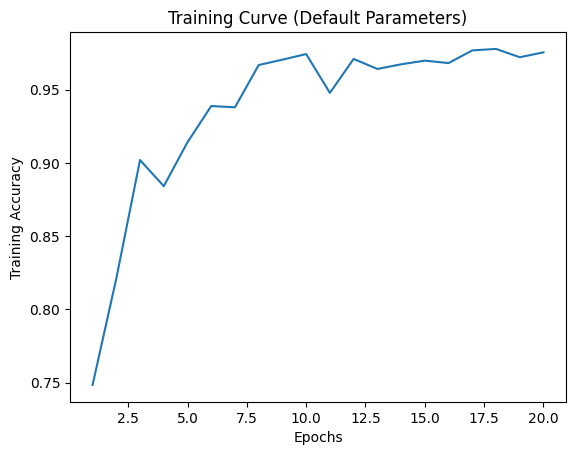

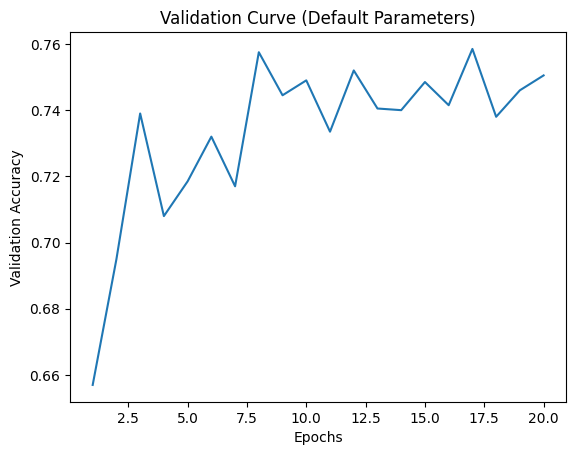

In [ ]:
import torchvision.models as models
model_integrated = IntegratedModel()
if torch.cuda.is_available():
    model_integrated.cuda()
train_acc_integrated, val_acc_integrated, epochs_integrated = train(model_integrated, train_loader, val_loader)
plot_curve(train_acc_integrated, epochs_integrated, "Training")
plot_curve(val_acc_integrated, epochs_integrated, "Validation")

In [ ]:
import torchvision.models as models
model_integrated = IntegratedModel()
if torch.cuda.is_available():
    model_integrated.cuda()


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 64.4MB/s]


In [ ]:
import torchvision
import torchvision.transforms as transforms
import torch.utils.data
import torchvision.datasets as datasets
batch_size = 30;
num_workers = 0;
from google.colab import drive
drive.mount('/content/gdrive')
transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])


geoguessr = '/content/gdrive/MyDrive/Colab Notebooks/project/geoguessr'
new_path = geoguessr+'/test_newdata'
new_dataset = torchvision.datasets.ImageFolder(new_path,transform=transform)
new_loader = torch.utils.data.DataLoader(new_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
def test(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    test_accuracy = get_accuracy(model, test_loader)
    print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Load the best model from the training phase (replace with the actual path to the best model)
checkpoint = torch.load('/content/gdrive/MyDrive/Colab Notebooks/project/geoguessr/junh.0005_epoch7', map_location=torch.device('cpu'))
from collections import OrderedDict
model_weights = OrderedDict()

# Iterate through the checkpoint's keys and add them to the OrderedDict
for key in checkpoint.keys():
    model_weights[key] = checkpoint[key]

# Load the weights into the model
model_integrated.load_state_dict(model_weights)
#model_state_dict = checkpoint['model_state_dict']
#mode1l.load_state_dict(model_state_dict)

# Test the model on the test set
test(model_integrated, new_loader)

Test accuracy: 75.59%


In [ ]:
# load the saved weights
model_integrated.load_state_dict(torch.load('/content/model_integrated_model_bs27_lr0.0005_epoch7'))

# set the model to evaluation mode
model_integrated.eval()

IntegratedModel(
  (mobilenet): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_s